# 입지분석이란?
## 입지에 영향을 미치는 범위 내의 입지 구성요소를 정성적, 정량적 방법으로 측정함으로써 환경을 이해하고 최적의 목표가 달성될 수 있도록 위치적 조건을 분석하는 과정

In [7]:
# library
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances,silhouette_score,adjusted_rand_score,normalized_mutual_info_score
from sklearn import preprocessing

# data
data = pd.read_csv("C:/폐교/2022.csv")
data.head()

,소계,year,silver_hall,welfare_facil_w,popu65,jobforpay,ratio_old,stress,melancholy,poor_60,infra
0,진주시,2022,18,0.874751,61702,23823,18.2,19.6,5.6,30851.0,573
1,통영시,2022,4,0.980119,"26,421",10201,21.6,19.7,12.0,13210.5,194
2,사천시,2022,7,0.974155,"25,497",9844,23.7,4.4,7.1,12748.5,162
3,김해시,2022,3,0.787276,"65,467",25277,12.4,22.8,14.3,32733.5,592
4,밀양시,2022,2,0.970179,30980,11961,30.7,14.3,11.6,15490.0,139


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   소계               18 non-null     object 
 1   year             18 non-null     int64  
 2   silver_hall      18 non-null     int64  
 3   welfare_facil_w  18 non-null     float64
 4   popu65           18 non-null     object 
 5   jobforpay        18 non-null     int64  
 6   ratio_old        18 non-null     float64
 7   stress           18 non-null     float64
 8   melancholy       18 non-null     float64
 9   poor_60          18 non-null     float64
 10  infra            18 non-null     int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.7+ KB


In [9]:
# 원본 보관 
data_raw = data

# 불필요한 칼럼 삭제
del data['소계']
del data['year']
del data['popu65']

data

,silver_hall,welfare_facil_w,jobforpay,ratio_old,stress,melancholy,poor_60,infra
0,18,0.874751,23823,18.2,19.6,5.6,30851.0,573
1,4,0.980119,10201,21.6,19.7,12.0,13210.5,194
2,7,0.974155,9844,23.7,4.4,7.1,12748.5,162
3,3,0.787276,25277,12.4,22.8,14.3,32733.5,592
4,2,0.970179,11961,30.7,14.3,11.6,15490.0,139
5,7,0.988072,11180,12.1,7.0,9.0,14477.5,247
6,8,0.880716,20070,15.0,5.0,8.8,25990.0,508
7,39,0.705765,61995,16.3,18.8,5.7,80283.0,1429
8,0,1.000000,3893,38.2,14.9,8.9,5041.5,49
9,1,1.000000,6468,27.2,15.2,2.2,8375.5,73


In [10]:
data.columns

Index(['silver_hall', 'welfare_facil_w', 'jobforpay', 'ratio_old', 'stress',
       'melancholy', 'poor_60', 'infra'],
      dtype='object')

# 표준화

In [11]:
from sklearn.preprocessing import StandardScaler

x = data

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['silver_hall', 'welfare_facil_w', 'jobforpay', 'ratio_old', 'stress',
       'melancholy', 'poor_60', 'infra']

pd.DataFrame(x, columns=features).head()

,silver_hall,welfare_facil_w,jobforpay,ratio_old,stress,melancholy,poor_60,infra
0,1.223810,-0.875858,0.803647,-1.005957,1.136717,-0.104318,0.803667,0.948700
1,-0.325939,0.448339,-0.213013,-0.653354,1.152702,1.519661,-0.213001,-0.188740
2,0.006150,0.373385,-0.239657,-0.435569,-1.293016,0.276302,-0.239627,-0.284777
3,-0.436636,-1.975191,0.912164,-1.607458,1.648240,2.103278,0.912161,1.005722
4,-0.547332,0.323415,-0.081658,0.290379,0.289508,1.418162,-0.081627,-0.353803


# pca 실행

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])

In [13]:
principalDf.head()

,pc1,pc2
0,2.401146,-0.062308
1,0.098431,2.004162
2,-0.545406,-0.054942
3,3.004364,2.529686
4,-0.361147,1.324376


In [14]:
pca.explained_variance_ratio_

array([0.6664236 , 0.17202122])

In [15]:
sum(pca.explained_variance_ratio_)

0.8384448182890002

두 개의 주성분이 전체 분산의 약 83% 설명

# 두 개의 주성분을 이용한 2022 시각화

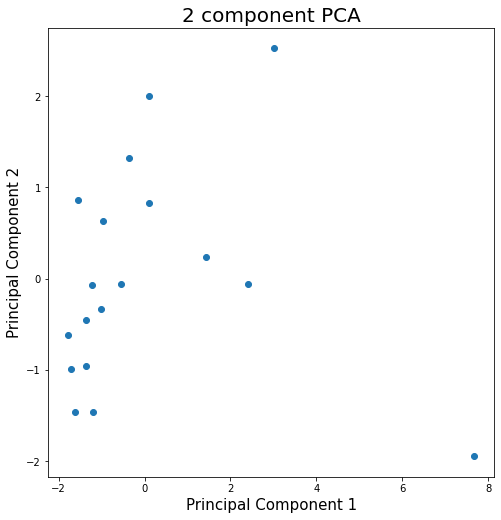

In [16]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)
plt.subplots_adjust(bottom=0.1)
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1])

plt.show()

# fitting k-medoids

In [17]:
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(principalDf)
y_kmed = kMedoids.fit_predict(principalDf)

In [18]:
y_kmed

array([0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1], dtype=int64)

In [19]:
kMedoids.inertia_

20.77191258846838

# silhouette to evaluate cluster

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(principalDf)
y_kmed = kMedoids.fit_predict(principalDf)
silhouette_avg = silhouette_score(principalDf, y_kmed)
print(silhouette_avg)

0.24345206494512922


In [21]:
sample_silhouette_values = silhouette_samples(principalDf, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

-0.08785445329061775
0.6134876990889065
0.26311791333021434


# use silhouette width to find number of cluster

In [22]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(principalDf)
    y_kmed = kMedoids.fit_predict(principalDf)
    silhouette_avg = silhouette_score(principalDf, y_kmed)
    sw.append(silhouette_avg)

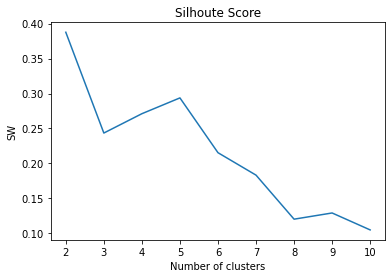

In [23]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

No handles with labels found to put in legend.


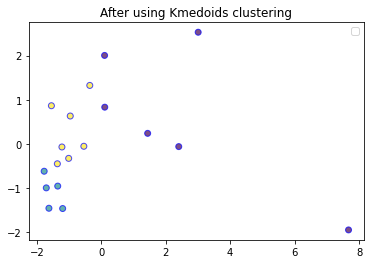

In [24]:
kmedoids = KMedoids(n_clusters=3, metric='euclidean', init='heuristic', max_iter=300, random_state=None)
kmedoids.fit(principalDf)
y_kmedoids = kmedoids.predict(principalDf)
plt.scatter(principalDf.pc1, principalDf.pc2, c = y_kmedoids, cmap = 'viridis', alpha = 0.7, edgecolors = 'b')
plt.title("After using Kmedoids clustering")
plt.legend()
plt.show()